In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the data
data = load_wine()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
# Description of the data
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [9]:
# Features
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
# Create a dataframe with the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
# Add the target and target names to the dataframe
df['target'] = data.target
df['target_names'] = df.target.apply(lambda x: data.target_names[x])

In [12]:
df.head().T

,0,1,2,3,4
alcohol,14.23,13.2,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.5,2.87
alcalinity_of_ash,15.6,11.2,18.6,16.8,21.0
magnesium,127.0,100.0,101.0,113.0,118.0
total_phenols,2.8,2.65,2.8,3.85,2.8
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.3,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.8,4.32


In [13]:
# Check for null values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
target_names                    0
dtype: int64

In [14]:
# Check the distribution of the target
df.target_names.value_counts()

target_names
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [15]:
# Check the distribution of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [16]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
target_names                     object
dtype: object

In [17]:
obj_df = df.select_dtypes(include=['object']).copy()
num_df = df.select_dtypes(include=['float64', 'int64']).copy()

In [18]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_df = obj_df.apply(le.fit_transform)

In [19]:
label_df.head()

,target_names
0,0
1,0
2,0
3,0
4,0


In [20]:
#concatenate the label and numerical dataframes 
new_df = pd.concat([num_df, label_df], axis=1)

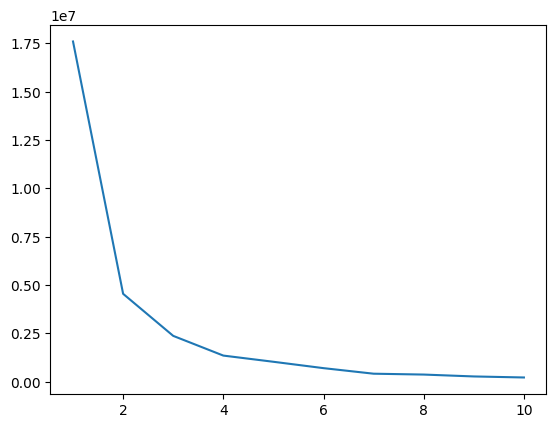

In [21]:
#findin optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

In [22]:
#fitting kmeans to the dataset
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(new_df)


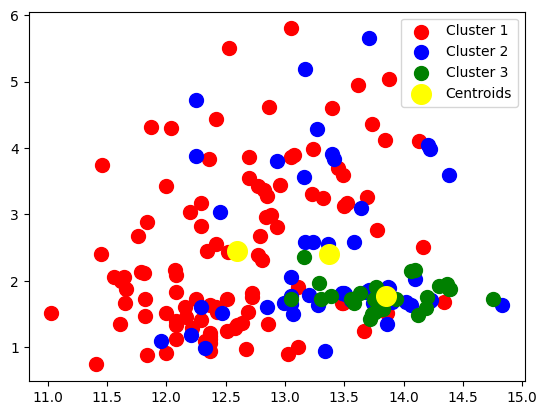

In [23]:
plt.scatter(new_df.iloc[y_kmeans == 0, 0], new_df.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(new_df.iloc[y_kmeans == 1, 0], new_df.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(new_df.iloc[y_kmeans == 2, 0], new_df.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.legend()


<Axes: xlabel='alcohol', ylabel='malic_acid'>

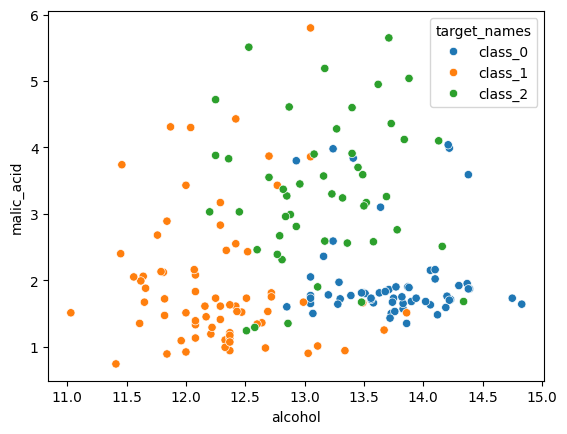

In [24]:
sns.scatterplot(x='alcohol', y='malic_acid', hue='target_names', data=df)

In [25]:
#shilouette score
from sklearn.metrics import silhouette_score
silhouette_score(new_df, y_kmeans)

0.55956126417174

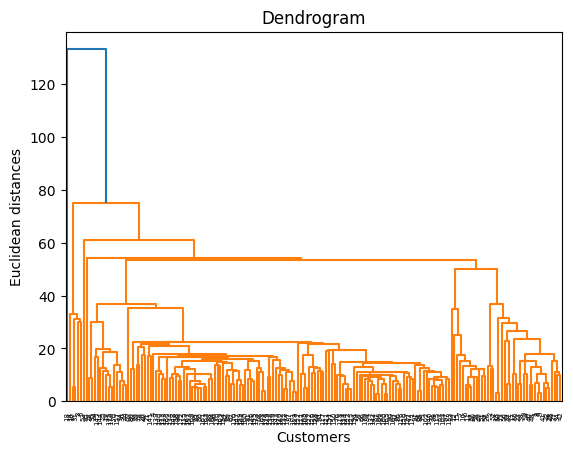

In [26]:
#hierarchical clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(new_df, method='single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)
y_dbscan = dbscan.fit_predict(new_df)

<Axes: xlabel='alcohol', ylabel='malic_acid'>

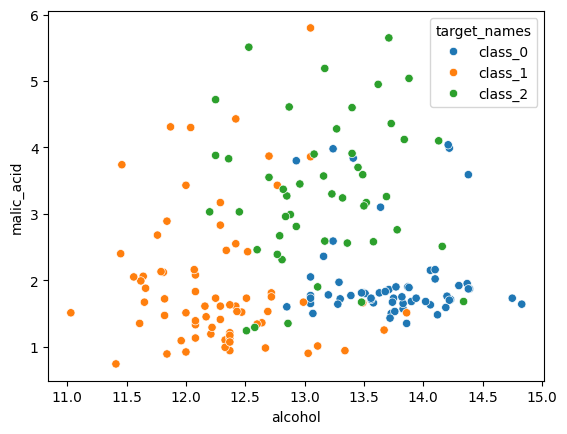

In [28]:
sns.scatterplot(x='alcohol', y='malic_acid', hue='target_names', data=df)

In [29]:
# #shilouette score
# from sklearn.metrics import silhouette_score
# silhouette_score(new_df, y_dbscan)